# Prodigy Task 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

# load data

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset

data = pd.read_csv('/content/bank readable.csv')
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#clean data

In [31]:
data.head(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
data.fillna(0, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['job', 'marital', 'education',  'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [35]:
data.dropna(axis=0,inplace=True)

In [38]:
data.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 61, dtype: int64

In [39]:
data.tail()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41187,74,239,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,True,False,False


# data cleaning


In [40]:
data = data[data['y'] != 'retired']

In [41]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
data = data[data['y'] != 'retired']

#Train the decision tree classifier:

In [43]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [44]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# evaluate the tree model

In [45]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8856518572469045


In [46]:
from sklearn.tree import export_graphviz

export_graphviz(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="nr.employed <= 5087.65\\nentropy = 0.507\\nsamples = 32950\\nvalue = [29245, 3705]\\nclass = No", fillcolor="#e89152"] ;\n1 [label="duration <= 158.5\\nentropy = 0.992\\nsamples = 3976\\nvalue = [2199, 1777]\\nclass = No", fillcolor="#fae7d9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="duration <= 62.5\\nentropy = 0.615\\nsamples = 1361\\nvalue = [1154, 207]\\nclass = No", fillcolor="#ea985d"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 203\\nvalue = [203, 0]\\nclass = No", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="pdays <= 14.5\\nentropy = 0.677\\nsamples = 1158\\nvalue = [951, 207]\\nclass = No", fillcolor="#eb9c64"] ;\n2 -> 4 ;\n5 [label="cons.price.idx <= 93.559\\nentropy = 0.955\\nsamples = 189\\nvalue = [118, 71]\\nclass = No", fillcolor="#f5cdb0"] ;\n4 -> 5 ;\n6 [label="day_of_week_mon <= 0.5\\nentropy

# visualize the Decision tree

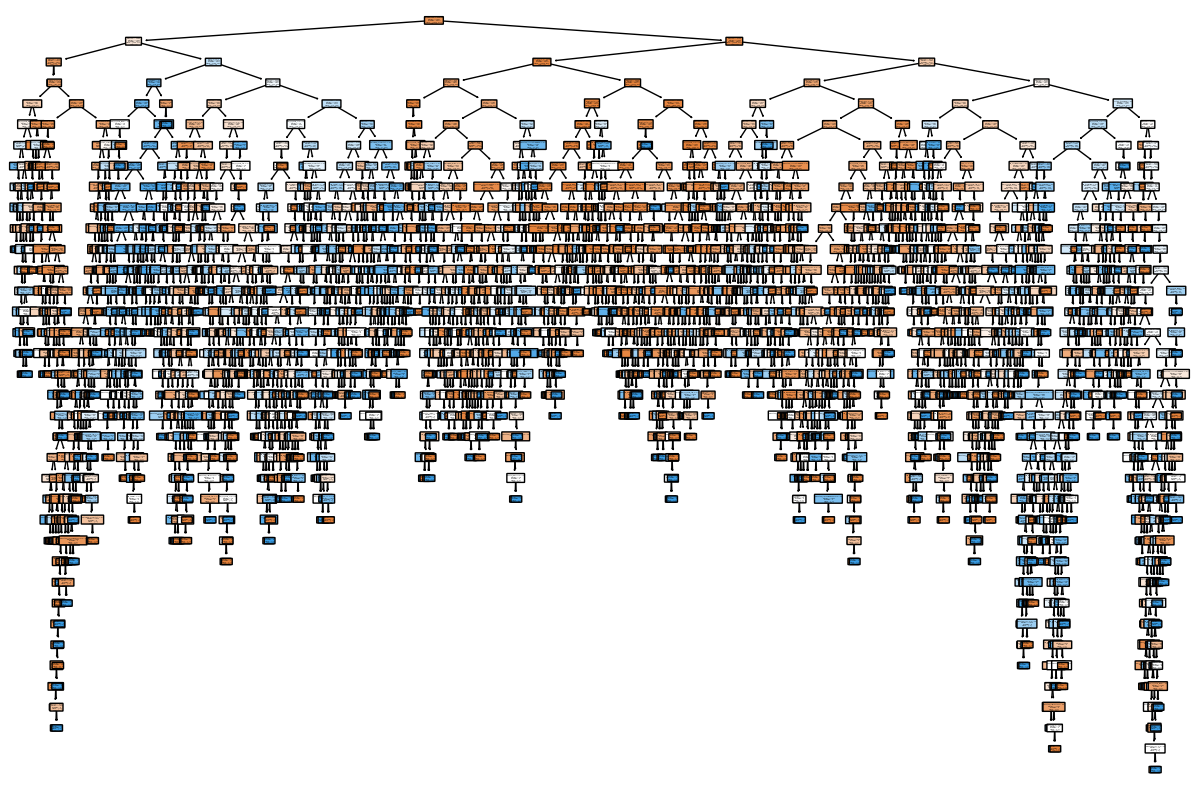

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()